# Exercício de Laboratório: Regressão Linear com a Equação Normal

**Objetivo:** aplicar o método da Equação Normal para encontrar os parâmetros ótimos de um modelo de Regressão Linear e, em seguida, verificar os resultados usando a biblioteca Scikit-Learn.

Você irá:
1.  Gerar dados sintéticos com uma tendência linear decrescente.
2.  Usar a Equação Normal e o NumPy para encontrar os melhores parâmetros para o seu modelo de Regressão Linear.
3.  Fazer previsões e plotar a reta de regressão.
4.  Verificar seus resultados usando a classe `LinearRegression` do Scikit-Learn.

### Passo 1: Importar Bibliotecas

A célula de código abaixo importa todas as bibliotecas que usaremos neste exercício: `NumPy` para cálculos numéricos, `Matplotlib` para plotagem e `Scikit-Learn` para o modelo de Regressão Linear.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Passo 2: Gerar Dados Sintéticos

No livro, os dados foram gerados com a equação `y = 4 + 3x + ruído`. Para este exercício, vamos usar uma equação diferente para criar dados com uma correlação negativa (uma reta decrescente). Além disso, os valores do atributo vão de 2 até 6.

**Sua Tarefa:** Complete a célula de código a seguir para gerar 100 pontos de dados usando a equação **`y = 5 - 2x + ruído Gaussiano`**.

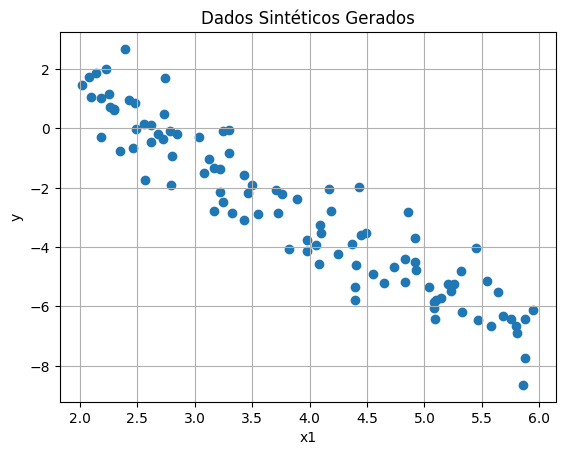

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Para garantir que seja possível reproduzir os resultados
np.random.seed(42)

# Gere 100 instâncias
m = 100

# ############################################################### #
# Gera vetor de características X com valores entre 2 e 6
X = 2 + 4 * np.random.rand(m)

# Gera ruído Gaussiano
noise = np.random.randn(m)

# Gera vetor de rótulos y usando a equação y = 5 - 2x + ruído
y = 5 - 2 * X + noise
# ############################################################### #

# Vamos plotar os dados para visualizá-los
plt.scatter(X, y)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Dados Sintéticos Gerados")
plt.grid(True)
plt.show()


### Passo 3: Encontrar Parâmetros com a Equação Normal

Agora, você irá calcular os parâmetros ótimos ($\hat{\theta}$) para o seu modelo. Conforme visto na aula, para encontrar o valor de $\theta$ que minimiza a função de custo, existe uma solução de forma fechada conhecida como a Equação Normal:

$$\hat{\theta} = (X^T X)^{-1} X^T y$$

**Sua Tarefa:**
1.  Adicione o termo de viés ($x_0 = 1$) a cada instância no seu conjunto de dados `X`. Isso é necessário para que a Equação Normal calcule o intercepto ($\theta_0$).
2.  Implemente a Equação Normal usando as operações de álgebra linear do NumPy para encontrar `theta_best`.

In [40]:
import numpy as np

# 1. Adiciona o termo de viés (x0 = 1) a cada instância
X_b = np.c_[np.ones((m, 1)), X.reshape(-1, 1)]  # X.reshape para garantir formato coluna

# 2. Aplica a Equação Normal
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y.reshape(-1, 1)

# Exibe os parâmetros encontrados
print("Parâmetros encontrados com a Equação Normal:")
print(f"Theta 0 (Intercepto): {theta_best[0][0]:.2f}")
print(f"Theta 1 (Coeficiente): {theta_best[1][0]:.2f}")


Parâmetros encontrados com a Equação Normal:
Theta 0 (Intercepto): 5.44
Theta 1 (Coeficiente): -2.11


### Passo 4: Fazer Previsões e Plotar a Reta de Regressão

Com os parâmetros em `theta_best`, seu modelo está treinado! Agora você pode usá-lo para fazer previsões em novos dados.

**Sua Tarefa:**
1.  Crie um novo conjunto de dados `X_new` para prever os valores de y quando x=2 e x=6.
2.  Adicione o termo de viés a `X_new`.
3.  Calcule as previsões `y_predict` usando `theta_best`.
4.  Plote a reta de regressão resultante sobre os dados originais para visualizar o ajuste do modelo.

Previsões para X_new:
[[ 1.21509616]
 [-7.24467707]]


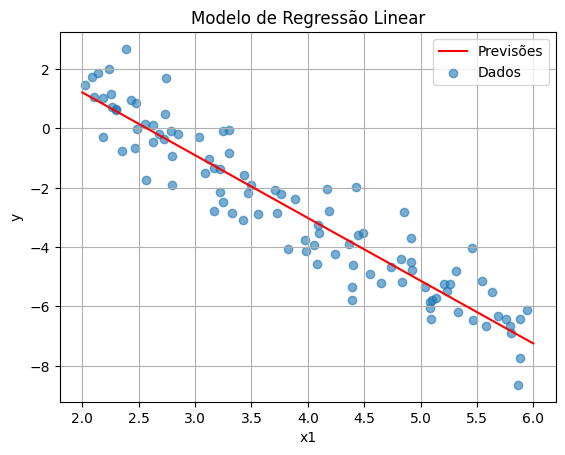

In [41]:
# 1. Crie X_new para fazer previsões
X_new = np.array([[2], [6]])

# 2. Adicione o termo de viés a X_new para criar X_new_b
X_new_b = np.c_[np.ones((2, 1)), X_new]

# 3. Calcule as previsões
y_predict = X_new_b @ theta_best

# Exiba as previsões
print("Previsões para X_new:")
print(y_predict)

# Plote a reta de regressão
plt.plot(X_new, y_predict, "r-", label="Previsões")  # reta de regressão
plt.scatter(X, y, alpha=0.6, label="Dados")          # dados originais
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Modelo de Regressão Linear")
plt.legend()
plt.grid(True)
plt.show()


### Passo 5: Verificar com Scikit-Learn

Realizar a Regressão Linear usando o Scikit-Learn é muito mais direto. A classe `LinearRegression` lida com o termo de viés automaticamente e usa um método de otimização computacionalmente mais eficiente (SVD) nos bastidores.

**Sua Tarefa:**
1.  Crie e treine uma instância da classe `LinearRegression`.
2.  Imprima o `intercept_` (intercepto) e o `coef_` (coeficiente) do modelo treinado. Os valores devem ser praticamente idênticos aos que você calculou com a Equação Normal.

In [42]:
from sklearn.linear_model import LinearRegression

# 1. Crie o modelo de Regressão Linear
lin_reg = LinearRegression()

# 2. Treine o modelo com os dados originais (X precisa estar em formato 2D)
lin_reg.fit(X.reshape(-1, 1), y)

# 3. Faça previsões para X_new
y_predict = lin_reg.predict(X_new)

# Exiba os parâmetros encontrados pelo Scikit-Learn
print("Parâmetros encontrados com Scikit-Learn:")
print(f"Intercepto: {lin_reg.intercept_:.2f}")
print(f"Coeficiente: {lin_reg.coef_[0]:.2f}")

# Exiba as previsões
print("Previsões para X_new com Scikit-Learn:")
print(y_predict)


Parâmetros encontrados com Scikit-Learn:
Intercepto: 5.44
Coeficiente: -2.11
Previsões para X_new com Scikit-Learn:
[ 1.21509616 -7.24467707]


**Conclusão**

Se tudo correu bem, os parâmetros que você calculou manualmente usando a Equação Normal devem corresponder exatamente aos parâmetros encontrados pela biblioteca Scikit-Learn.
Isso demonstra como o Scikit-Learn simplifica o processo (e torna-o mais eficiente pelo uso da pseudo-inversa), mas entender a matemática subjacente, como a Equação Normal, é fundamental para fazer boas escolher no projeto de sistemas de aprendizado de máquina.